<a href="https://colab.research.google.com/github/Alluraghava9/Getting-Started-with-the-Vertex-AI-Gemini-API-Python-SDK/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [ ]:
df_train_original = pd.read_csv('/content/train.csv')
df_train = df_train_original.copy()
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
print('Train Data Size : ',df_train.shape)

Train Data Size :  (10157, 28)


In [ ]:
df_train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10157 non-null  object 
 1   Customer_ID               10157 non-null  object 
 2   Month                     10157 non-null  object 
 3   Name                      9149 non-null   object 
 4   Age                       10157 non-null  object 
 5   SSN                       10157 non-null  object 
 6   Occupation                10157 non-null  object 
 7   Annual_Income             10157 non-null  object 
 8   Monthly_Inhand_Salary     8663 non-null   float64
 9   Num_Bank_Accounts         10157 non-null  int64  
 10  Num_Credit_Card           10157 non-null  int64  
 11  Interest_Rate             10157 non-null  int64  
 12  Num_of_Loan               10157 non-null  object 
 13  Type_of_Loan              8949 non-null   object 
 14  Delay_

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,8663.0,4320.495020,3217.103144,355.208333,1684.832083,3260.465000,6094.433333,14836.736667
Num_Bank_Accounts,10157.0,17.519642,122.161565,0.000000,3.000000,6.000000,8.000000,1789.000000
Num_Credit_Card,10157.0,24.792065,140.026611,0.000000,4.000000,5.000000,7.000000,1486.000000
Interest_Rate,10157.0,74.042926,470.223100,1.000000,7.000000,13.000000,20.000000,5721.000000
Delay_from_due_date,10157.0,21.267106,14.588569,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,9946.0,24.661070,176.892261,0.000000,3.000000,5.000000,9.000000,2592.000000
Credit_Utilization_Ratio,10157.0,32.289234,5.151950,20.172942,27.975990,32.274247,36.518992,50.000000
Total_EMI_per_month,10157.0,1388.932935,8170.215990,0.000000,28.249307,67.220560,163.588847,82204.000000


In [ ]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,10157,10157,0x5182,1
Customer_ID,10157,1270,CUS_0x765b,8
Month,10157,8,January,1270
Name,9149,1244,Kevin Yaou,23
Age,10157,300,36,347
SSN,10157,1271,#F%$D@*&8,581
Occupation,10157,16,Lawyer,747
Annual_Income,10157,1932,12332.855,8
Num_of_Loan,10157,65,2,1585
Type_of_Loan,8949,820,Home Equity Loan,144


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def get_column_details(df,column):
    print("Details of",column,"column")
    print("\nDataType: ",df[column].dtype)
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
    print("\nNumber of Unique Values: ",df[column].nunique())
    print("\nDistribution of column:\n")
    print(df[column].value_counts())


In [ ]:
def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iat[0])
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())

In [ ]:
def clean_categorical_field(df,groupby,column,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
    fill_missing_with_group_mode(df,groupby,column)

In [ ]:
def fix_inconsistent_values(df, groupby, column):
    print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')

    df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
    mini, maxi = x[0][0], y[0][0]

    col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)|(x<0)) else x)
    mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    df[column] = col.fillna(mode_by_group)
    df[column].fillna(df[column].mean(),inplace=True)

    print("\nAfter Cleaning Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
    print("\nNo. of Unique values after Cleaning:",df[column].nunique())
    print("\nNo. of Null values after Cleaning:",df[column].isnull().sum())


In [ ]:

def clean_numerical_field(df,groupby,column,strip=None,datatype=None,replace_value=None):
    print("\n-----------------------------------------------------")
    print("\nCleaning steps ")
    if replace_value!=None:
        df[column] = df[column].replace(replace_value,np.nan)
        print(f"\nGarbage value {replace_value} is replaced with np.nan")
    if df[column].dtype == object and strip is not None:
        df[column] = df[column].str.strip(strip)
        print(f"\nTrailing & leading {strip} are removed")
    if datatype is not None:
        df[column] = df[column].astype(datatype)
        print(f"\nDatatype of {column} is changed to {datatype}")

    fix_inconsistent_values(df, groupby, column)


In [ ]:
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [ ]:
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep"
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)

    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

Details of Credit_Score column

DataType:  object

There are  1  null values

Number of Unique Values:  3

Distribution of column:

Credit_Score
Standard    5280
Poor        3001
Good        1875
Name: count, dtype: int64

-----------------------------------------------------

Credit Score Distribution


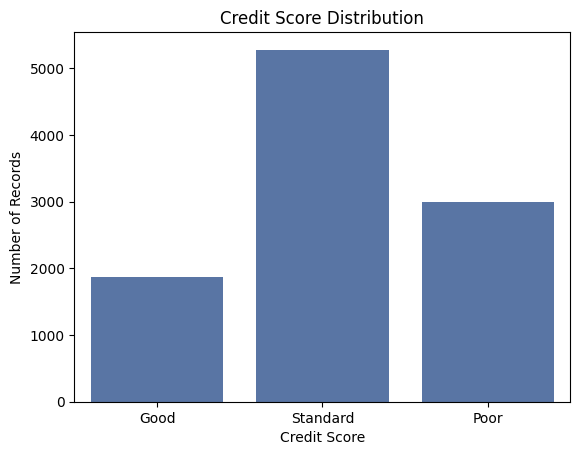

In [ ]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name)

In [ ]:
get_column_details(df_train,'ID')

Details of ID column

DataType:  object

There are no null values

Number of Unique Values:  10157

Distribution of column:

ID
0x5182    1
0x1602    1
0x1603    1
0x1604    1
0x1605    1
         ..
0x161a    1
0x161b    1
0x161c    1
0x161d    1
0x161e    1
Name: count, Length: 10157, dtype: int64


In [ ]:
get_column_details(df_train,'Customer_ID')

Details of Customer_ID column

DataType:  object

There are no null values

Number of Unique Values:  1270

Distribution of column:

Customer_ID
CUS_0x765b    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0xb891    8
             ..
CUS_0x4d43    8
CUS_0xb95f    8
CUS_0x3edc    8
CUS_0xbffe    8
CUS_0x6f4d    5
Name: count, Length: 1270, dtype: int64


In [ ]:
df_train.groupby(['Customer_ID'])['Credit_Score'].nunique()

,Credit_Score
Customer_ID,
CUS_0x100b,2
CUS_0x1037,1
CUS_0x104e,1
CUS_0x1056,1
CUS_0x105b,2
...,...
CUS_0xfdb,1
CUS_0xfdd,1
CUS_0xfe4,1


Details of Month column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Month
January     1270
February    1270
March       1270
April       1270
May         1270
June        1269
July        1269
August      1269
Name: count, dtype: int64

-----------------------------------------------------

Month & Credit_Score Distribution


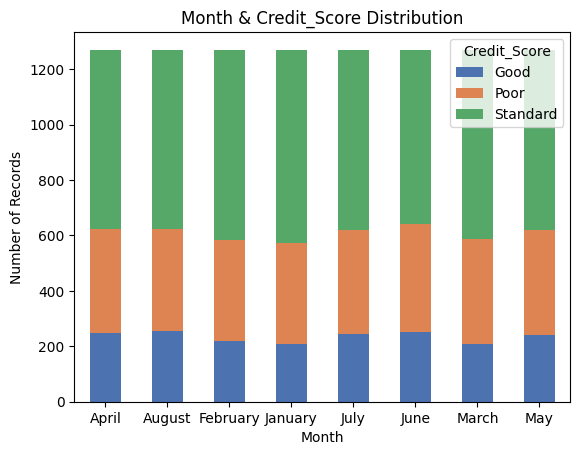

In [ ]:
column_name = 'Month'
get_column_details(df_train,column_name)
plot_stacked_bar(df_train,column_name,'Credit_Score')

In [ ]:
df_train['Month'] = pd.to_datetime(df_train.Month, format='%B').dt.month

In [ ]:
column_name = 'Name'
group_by = 'Customer_ID'
get_column_details(df_train,column_name)
clean_categorical_field(df_train,group_by,column_name)

Details of Name column

DataType:  object

There are  1008  null values

Number of Unique Values:  1244

Distribution of column:

Name
Kevin Yaou                23
Camposg                   16
Caroline Valetkevitchr    16
Rickt                     16
Strupczewskid             16
                          ..
Oreskovicz                 4
McBrideq                   4
Josephine Masonz           4
Ross Kerberb               3
Luke Bakerg                3
Name: count, Length: 1244, dtype: int64

-----------------------------------------------------

Cleaning steps 

No. of missing values before filling with group mode: 1008

No. of missing values after filling with group mode: 0


In [ ]:
column_name = 'SSN'
group_by = 'Customer_ID'
garbage_value = '#F%$D@*&8'
get_column_details(df_train,column_name)
clean_categorical_field(df_train,group_by,column_name,garbage_value)

Details of SSN column

DataType:  object

There are no null values

Number of Unique Values:  1271

Distribution of column:

SSN
#F%$D@*&8      581
959-67-2735      8
210-64-7351      8
554-33-7055      8
308-92-6427      8
              ... 
587-81-5669      5
237-77-2781      5
183-55-0659      5
753-72-2651      4
433-42-8444      4
Name: count, Length: 1271, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value #F%$D@*&8 is replaced with np.nan

No. of missing values before filling with group mode: 581

No. of missing values after filling with group mode: 0


Details of Occupation column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

Occupation
Lawyer           747
_______          698
Journalist       698
Entrepreneur     670
Mechanic         670
Teacher          665
Doctor           654
Writer           638
Architect        633
Musician         628
Media_Manager    615
Scientist        604
Accountant       585
Manager          572
Engineer         544
Developer        536
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _______ is replaced with np.nan

No. of missing values before filling with group mode: 698

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Occupation & Credit_Score Distribution


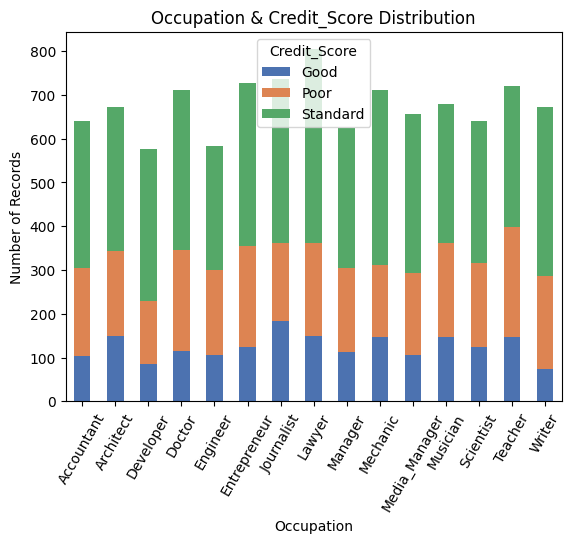

In [ ]:
column_name = 'Occupation'
group_by = 'Customer_ID'
garbage_value = '_______'
user_friendly_name = 'Occupation'
get_column_details(df_train,column_name)
clean_categorical_field(df_train,group_by,column_name,garbage_value)
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

In [ ]:
get_column_details(df_train,'Type_of_Loan')

Details of Type_of_Loan column

DataType:  object

There are  1208  null values

Number of Unique Values:  820

Distribution of column:

Type_of_Loan
Home Equity Loan                                                        144
Payday Loan                                                             144
Not Specified                                                           136
Mortgage Loan                                                           128
Personal Loan                                                           120
                                                                       ... 
Mortgage Loan, and Debt Consolidation Loan                                8
Credit-Builder Loan, Personal Loan, Student Loan, and Mortgage Loan       8
Debt Consolidation Loan, Credit-Builder Loan, and Mortgage Loan           8
Debt Consolidation Loan, Payday Loan, Payday Loan, and Personal Loan      8
Credit-Builder Loan, and Debt Consolidation Loan                          8
Name: count, L

In [ ]:
df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

<ipython-input-32-7acfeaa8ebd0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)


Details of Credit_Mix column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

Credit_Mix
Standard    3633
Good        2541
_           2056
Bad         1927
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value _ is replaced with np.nan

No. of missing values before filling with group mode: 2056

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Credit_Mix & Credit_Score Distribution


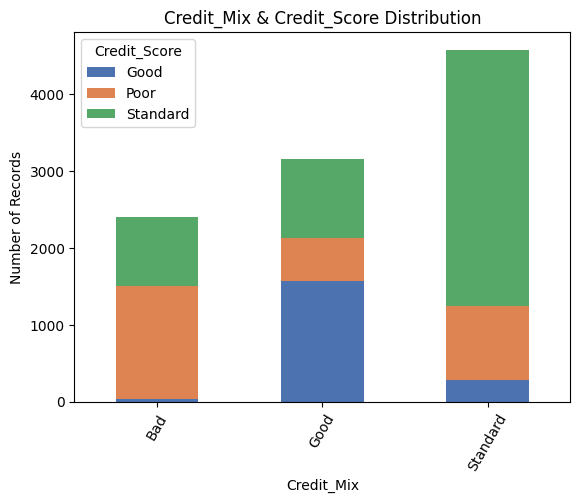

In [ ]:
column_name = 'Credit_Mix'
group_by = 'Customer_ID'
garbage_value = '_'
get_column_details(df_train,column_name)
clean_categorical_field(df_train,group_by,column_name,garbage_value)
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_of_Min_Amount column

DataType:  object

There are no null values

Number of Unique Values:  3

Distribution of column:

Payment_of_Min_Amount
Yes    5335
No     3591
NM     1231
Name: count, dtype: int64

-----------------------------------------------------

Payment_of_Min_Amount & Credit_Score Distribution


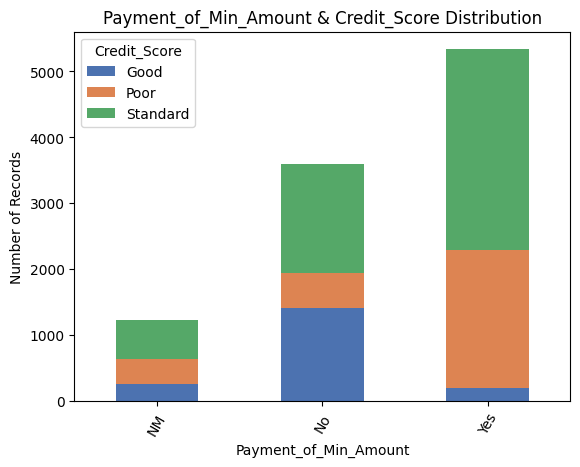

In [ ]:
column_name = 'Payment_of_Min_Amount'
get_column_details(df_train,column_name)
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=60)

Details of Payment_Behaviour column

DataType:  object

There are no null values

Number of Unique Values:  8

Distribution of column:

Payment_Behaviour
Low_spent_Small_value_payments      2526
High_spent_Medium_value_payments    1810
Low_spent_Medium_value_payments     1426
High_spent_Large_value_payments     1394
High_spent_Small_value_payments     1160
Low_spent_Large_value_payments      1046
!@9#%8                               794
High_spent_Large_value_paymen          1
Name: count, dtype: int64

-----------------------------------------------------

Cleaning steps 

Garbage value !@9#%8 is replaced with np.nan

No. of missing values before filling with group mode: 794

No. of missing values after filling with group mode: 0

-----------------------------------------------------

Payment_Behaviour & Credit_Score Distribution


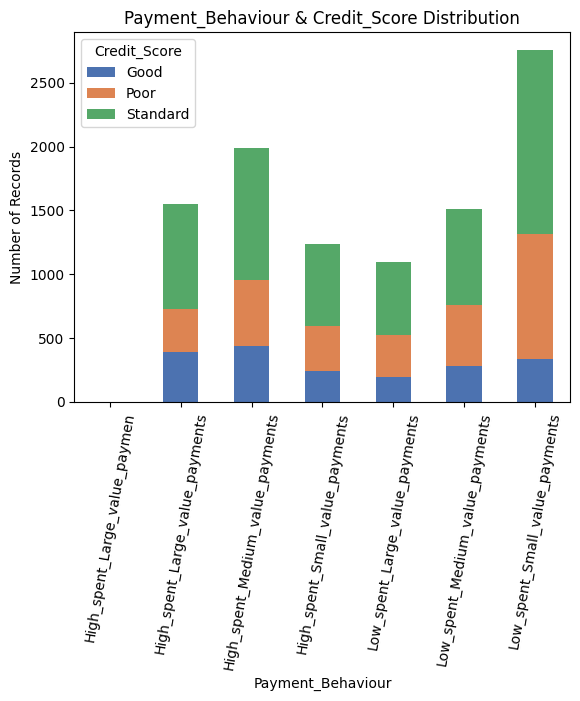

In [ ]:
column_name = 'Payment_Behaviour'
group_by = 'Customer_ID'
garbage_value = '!@9#%8'

#Get Details
get_column_details(df_train,column_name)

#Cleaning
clean_categorical_field(df_train,group_by,column_name,garbage_value)

#Plot Distribution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score',rotation=80)

Details of Age column

DataType:  int64

There are no null values

Number of Unique Values:  257

Distribution of column:

Age
36      367
34      340
27      316
26      314
19      312
       ... 
8352      1
3734      1
2056      1
5112      1
8406      1
Name: count, Length: 257, dtype: int64

-----------------------------------------------------

Age Distribution


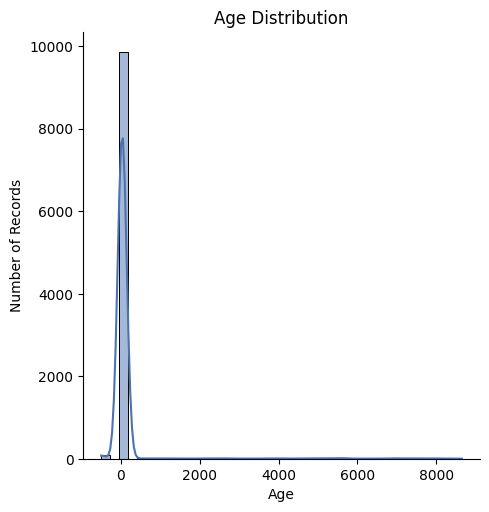

In [ ]:
column_name = 'Age'
group_by = 'Customer_ID'
user_friendly_name = 'Age'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Annual_Income column

DataType:  float64

There are no null values

Number of Unique Values:  1369

Distribution of column:

Annual_Income
20051.92       8
19114.12       8
34847.84       8
143162.64      8
30689.89       8
              ..
20441835.00    1
2351135.00     1
9594534.00     1
9494942.00     1
3950629.00     1
Name: count, Length: 1369, dtype: int64

-----------------------------------------------------

Annual Income Distribution


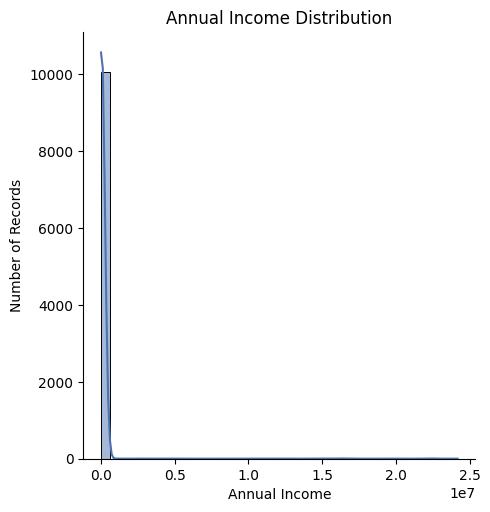

In [ ]:

if column_name not in df_train.columns:
    raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")
get_column_details(df_train, column_name)
plot_displot(df_train, column_name, user_friendly_name, bins=40)


Details of Monthly_Inhand_Salary column

DataType:  float64

There are  1494  null values

Number of Unique Values:  1333

Distribution of column:

Monthly_Inhand_Salary
3080.555000    14
1036.286667     8
1327.182500     8
2073.336250     8
2691.350000     8
               ..
2346.678333     1
7600.080755     1
3433.686488     1
1023.217588     1
6424.489495     1
Name: count, Length: 1333, dtype: int64

-----------------------------------------------------

Monthly Inhand Salary Distribution


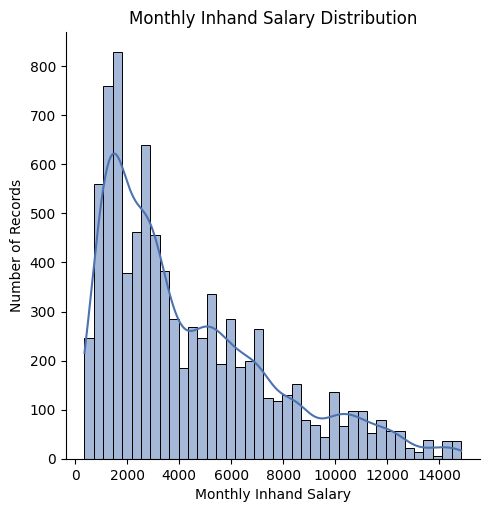

In [ ]:
column_name = 'Monthly_Inhand_Salary'
group_by = 'Customer_ID'
user_friendly_name = 'Monthly Inhand Salary'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,bins=40)

Details of Num_Bank_Accounts column

DataType:  int64

There are no null values

Number of Unique Values:  133

Distribution of column:

Num_Bank_Accounts
8       1486
6       1346
7       1228
3       1174
5       1158
        ... 
1139       1
744        1
803        1
1096       1
711        1
Name: count, Length: 133, dtype: int64

-----------------------------------------------------

Number of Bank Accounts Distribution


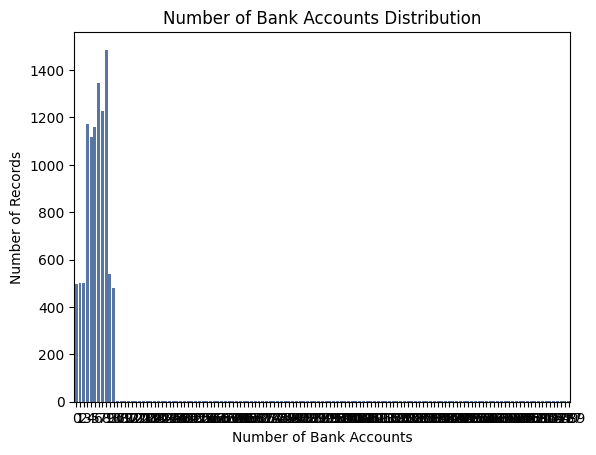

In [ ]:
column_name = 'Num_Bank_Accounts'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Bank Accounts'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name)

Details of Num_Credit_Card column

DataType:  int64

There are no null values

Number of Unique Values:  240

Distribution of column:

Num_Credit_Card
5       2071
6       1708
7       1613
4       1352
3       1345
        ... 
540        1
1208       1
1389       1
1480       1
1428       1
Name: count, Length: 240, dtype: int64

-----------------------------------------------------

Number of Credit Card Distribution


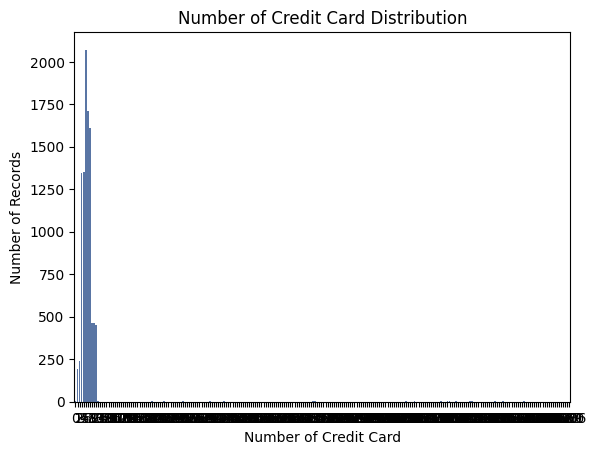

In [ ]:
column_name = 'Num_Credit_Card'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Card'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name)

Details of Interest_Rate column

DataType:  int64

There are no null values

Number of Unique Values:  246

Distribution of column:

Interest_Rate
8       564
6       530
5       455
7       451
18      447
       ... 
533       1
1684      1
1473      1
3050      1
5639      1
Name: count, Length: 246, dtype: int64

-----------------------------------------------------

Interest Rate Distribution


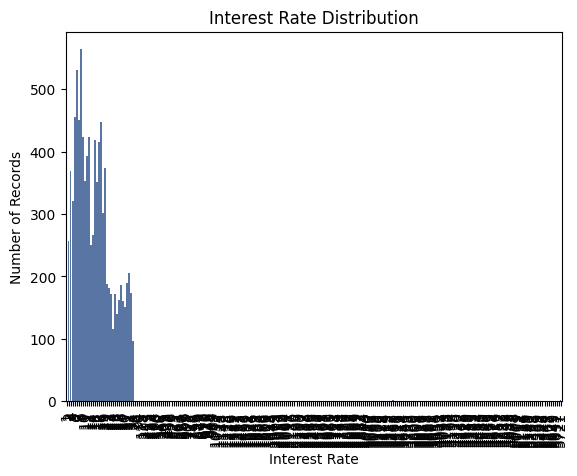

In [ ]:
column_name = 'Interest_Rate'
group_by = 'Customer_ID'
user_friendly_name = 'Interest Rate'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Delay_from_due_date column

DataType:  int64

There are no null values

Number of Unique Values:  73

Distribution of column:

Delay_from_due_date
 14    423
 13    380
 10    339
 12    337
 9     336
      ... 
 63      6
-5       4
-4       2
 67      1
 66      1
Name: count, Length: 73, dtype: int64

-----------------------------------------------------

Delay from Due Date Distribution


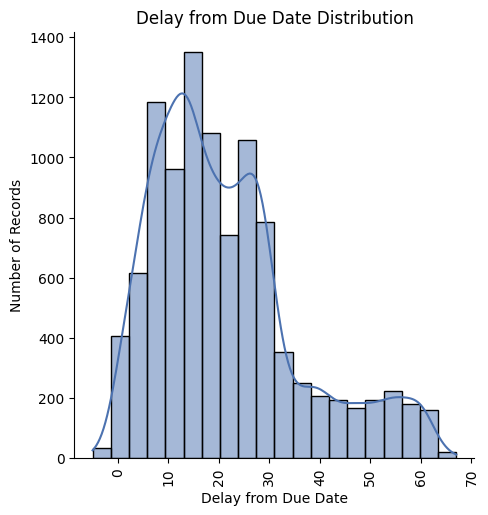

In [ ]:
column_name = 'Delay_from_due_date'
group_by = 'Customer_ID'
user_friendly_name = 'Delay from Due Date'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_of_Delayed_Payment column

DataType:  float64

There are  716  null values

Number of Unique Values:  104

Distribution of column:

Num_of_Delayed_Payment
17.0      596
20.0      577
16.0      557
8.0       549
19.0      536
         ... 
2655.0      1
1941.0      1
2882.0      1
4126.0      1
3539.0      1
Name: count, Length: 104, dtype: int64

-----------------------------------------------------

Number of Delayed Payment Distribution


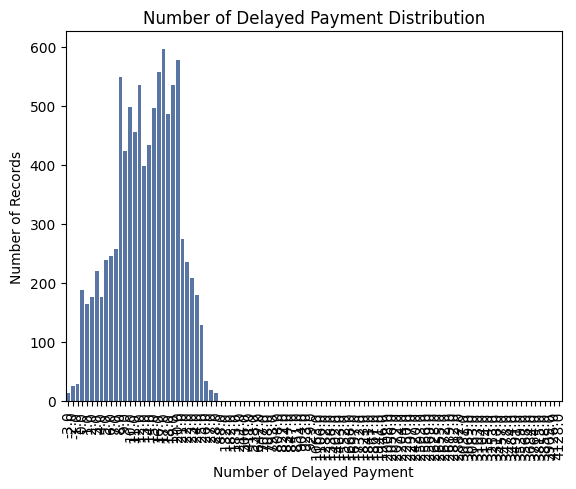

In [ ]:
column_name = 'Num_of_Delayed_Payment'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Delayed Payment'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Changed_Credit_Limit column

DataType:  object

There are no null values

Number of Unique Values:  1952

Distribution of column:

Changed_Credit_Limit
_                      204
6.06                    29
11.42                   27
13.92                   27
10.06                   26
                      ... 
-5.3100000000000005      1
35.83                    1
26.83                    1
30.45                    1
5.58                     1
Name: count, Length: 1952, dtype: int64

-----------------------------------------------------

Changed Credit Limit Distribution


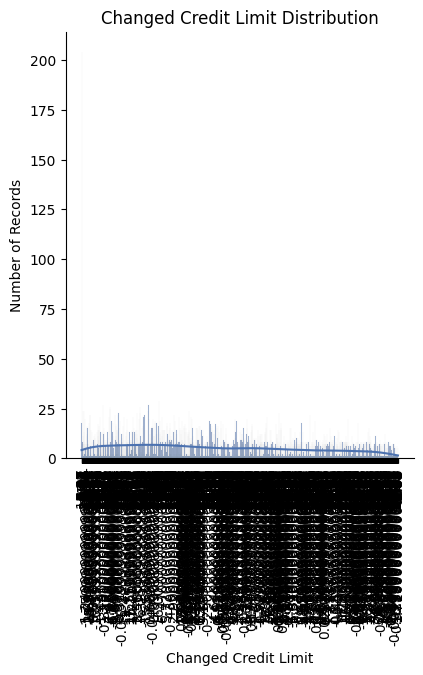

In [ ]:
column_name = 'Changed_Credit_Limit'
group_by = 'Customer_ID'
user_friendly_name = 'Changed Credit Limit'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Num_Credit_Inquiries column

DataType:  float64

There are  211  null values

Number of Unique Values:  164

Distribution of column:

Num_Credit_Inquiries
4.0       1130
3.0        884
1.0        857
6.0        855
2.0        819
          ... 
977.0        1
2158.0       1
1279.0       1
460.0        1
103.0        1
Name: count, Length: 164, dtype: int64

-----------------------------------------------------

Number of Credit Inquiries Distribution


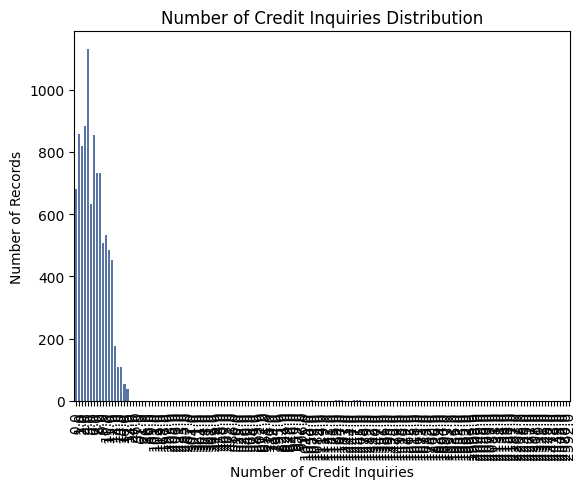

In [ ]:
column_name = 'Num_Credit_Inquiries'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Credit Inquiries'
get_column_details(df_train,column_name)
plot_countplot(df_train,column_name,user_friendly_name,rotation=90)

Details of Outstanding_Debt column

DataType:  object

There are no null values

Number of Unique Values:  1375

Distribution of column:

Outstanding_Debt
466.13      16
3119.6      16
1443.78      8
1421.99      8
168.0        8
            ..
165.88_      1
477.41_      1
886.09_      1
1716.82_     1
221.86_      1
Name: count, Length: 1375, dtype: int64

-----------------------------------------------------

Outstanding Debt Distribution


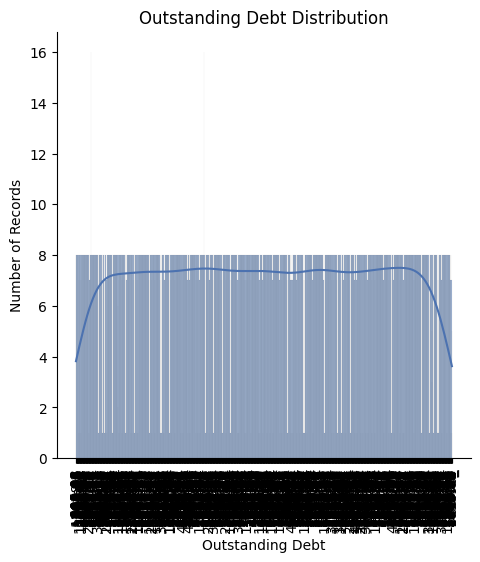

In [ ]:
column_name = 'Outstanding_Debt'
group_by = 'Customer_ID'
user_friendly_name = 'Outstanding Debt'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,rotation=90)

Details of Credit_Utilization_Ratio column

DataType:  float64

There are no null values

Number of Unique Values:  10157

Distribution of column:

Credit_Utilization_Ratio
40.299671    1
26.822620    1
31.944960    1
28.609352    1
31.377862    1
            ..
28.616735    1
41.702573    1
26.519815    1
39.501648    1
31.376150    1
Name: count, Length: 10157, dtype: int64

-----------------------------------------------------

Credit Utilization Ratio Distribution


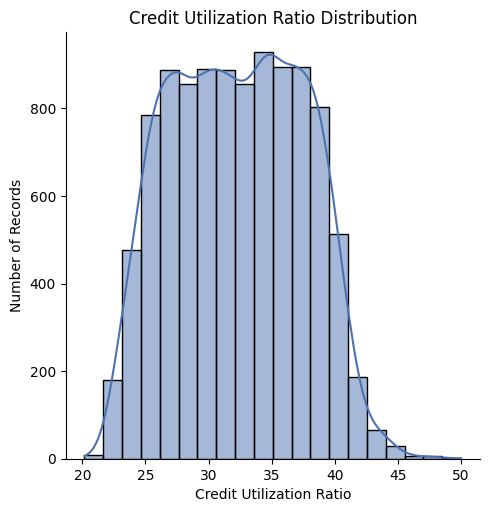

In [ ]:
column_name = 'Credit_Utilization_Ratio'
group_by = 'Customer_ID'
user_friendly_name = 'Credit Utilization Ratio'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name)

In [ ]:
df_train['Credit_History_Age'].value_counts()

,count
Credit_History_Age,
17 Years and 3 Months,54
17 Years and 9 Months,53
18 Years and 9 Months,50
18 Years and 10 Months,49
18 Years and 5 Months,49
...,...
4 Years and 2 Months,3
0 Years and 3 Months,3
33 Years and 7 Months,2


In [ ]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df_train['Credit_History_Age'] = df_train['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

Details of Credit_History_Age column

DataType:  float64

There are  946  null values

Number of Unique Values:  404

Distribution of column:

Credit_History_Age
207.0    54
213.0    53
225.0    50
226.0    49
221.0    49
         ..
50.0      3
3.0       3
403.0     2
1.0       2
404.0     1
Name: count, Length: 404, dtype: int64

-----------------------------------------------------

Credit History Age Distribution


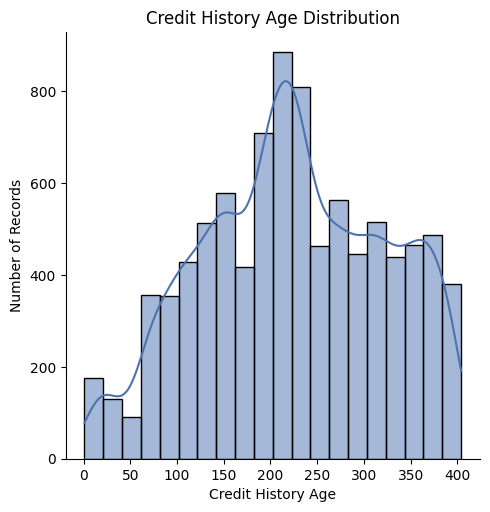

In [ ]:
column_name = 'Credit_History_Age'
group_by = 'Customer_ID'
user_friendly_name = 'Credit History Age'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name)

Details of Total_EMI_per_month column

DataType:  float64

There are no null values

Number of Unique Values:  1509

Distribution of column:

Total_EMI_per_month
0.000000        1133
36.907547          8
245.095892         8
82.632341          8
88.738054          8
                ... 
32378.000000       1
7293.000000        1
396.420084         1
3283.000000        1
45032.000000       1
Name: count, Length: 1509, dtype: int64

-----------------------------------------------------

Total EMI per month Distribution


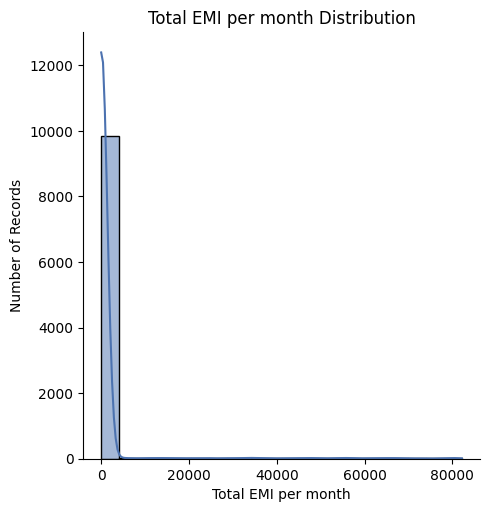

In [ ]:
column_name = 'Total_EMI_per_month'
group_by = 'Customer_ID'
user_friendly_name = 'Total EMI per month'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name)

Details of Amount_invested_monthly column

DataType:  object

There are  439  null values

Number of Unique Values:  9266

Distribution of column:

Amount_invested_monthly
__10000__             439
0.0                    15
145.351053329172        1
128.90471091574352      1
65.751067171071         1
                     ... 
253.8496842823705       1
243.79780924852867      1
59.618534271524496      1
74.64007609765288       1
204.82585206861447      1
Name: count, Length: 9266, dtype: int64

-----------------------------------------------------

Amount invested monthly Distribution


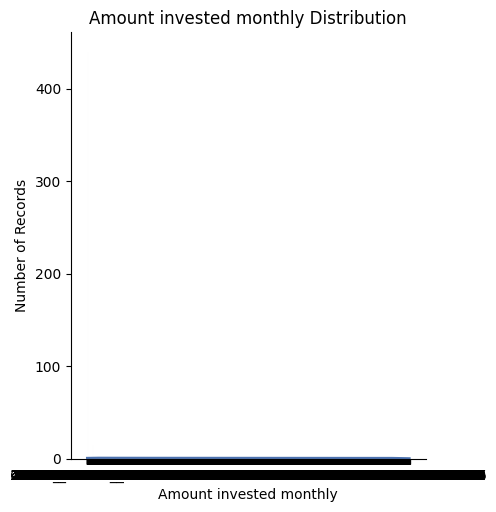

In [ ]:
column_name = 'Amount_invested_monthly'
group_by = 'Customer_ID'
user_friendly_name = 'Amount invested monthly'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,bins=100)

Details of Num_of_Loan column

DataType:  object

There are no null values

Number of Unique Values:  65

Distribution of column:

Num_of_Loan
2       1585
4       1426
3       1420
0       1110
1        982
        ... 
313        1
843        1
597_       1
617        1
720        1
Name: count, Length: 65, dtype: int64

-----------------------------------------------------

Number of Loan Distribution


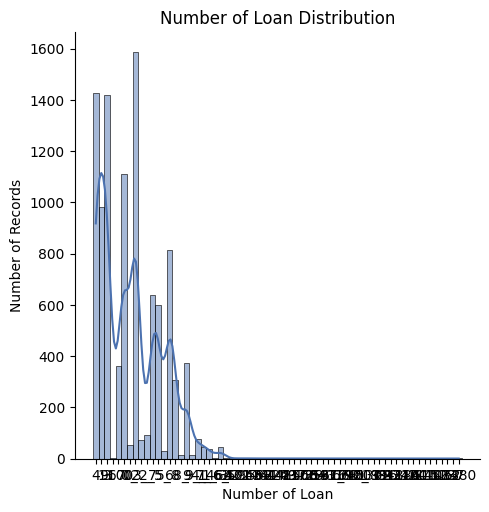

In [ ]:
column_name = 'Num_of_Loan'
group_by = 'Customer_ID'
user_friendly_name = 'Number of Loan'
get_column_details(df_train,column_name)
plot_displot(df_train,column_name,user_friendly_name,bins=30)

In [ ]:
df_train.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,1494
Num_Bank_Accounts,0


In [ ]:
print("Size of Dataset before dropping columns : ",df_train.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
df_train.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",df_train.shape)

Size of Dataset before dropping columns :  (10157, 28)
Size of Dataset after dropping columns :  (10157, 24)


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])

In [ ]:
df_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,12,19114.12,1824.843333,3,4,3,4,23,...,1,809.98,26.822620,265.0,1,49.574949,80.41529543900253,3,312.49408867943663,0
1,2,23,12,19114.12,NaN,3,4,3,4,23,...,1,809.98,31.944960,NaN,1,49.574949,118.28022162236736,4,284.62916249607184,0
2,3,-500,12,19114.12,NaN,3,4,3,4,23,...,1,809.98,28.609352,267.0,1,49.574949,81.699521264648,5,331.2098628537912,0
3,4,23,12,19114.12,NaN,3,4,3,4,23,...,1,809.98,31.377862,268.0,1,49.574949,199.4580743910713,6,223.45130972736786,0
4,5,23,12,19114.12,1824.843333,3,4,3,4,23,...,1,809.98,24.797347,269.0,1,49.574949,41.420153086217326,2,341.48923103222177,0


In [ ]:
X = df_train.drop('Credit_Score',axis=1)
y = df_train['Credit_Score']
print(X.shape)
print(y.shape)

(10157, 23)
(10157,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
X = df_train.drop('Credit_Score', axis=1)
y = df_train['Credit_Score']
object_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in object_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:

class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts == 1].index
X_filtered = X[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=17, stratify=y_filtered)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(8124, 23)
(2032, 23)
(8124,)
(2032,)


In [ ]:
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

    print("\n---------------------------------------------\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [ ]:

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussian NB', GaussianNB()),
    ('XGB', xgb.XGBClassifier())
]
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
for clf_name, clf in classifiers:
    scores = cross_val_score(clf, X_train_imputed, y_train, cv=5, scoring='accuracy')
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train_imputed, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train_imputed, y_train, cv=5, scoring='recall_macro').mean()
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')


Classifier: Decision Tree
Average Accuracy: 0.7185
Average Precision: 0.7125
Average Recall: 0.7093
-----------------------
Classifier: Random Forest
Average Accuracy: 0.7971
Average Precision: 0.7940
Average Recall: 0.8012
-----------------------
Classifier: KNN
Average Accuracy: 0.6262
Average Precision: 0.6003
Average Recall: 0.6135
-----------------------
Classifier: Gaussian NB
Average Accuracy: 0.6110
Average Precision: 0.5929
Average Recall: 0.6285
-----------------------
Classifier: XGB
Average Accuracy: 0.7923
Average Precision: 0.7851
Average Recall: 0.7890
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       375
           1       0.82      0.85      0.83       601
           2       0.85      0.81      0.83      1056

    accuracy                           0.82      2032
   macro avg       0.81      0.82      0.82      2032
weighted avg       0.82      0.82      0.82      2032


---------------------------------------------



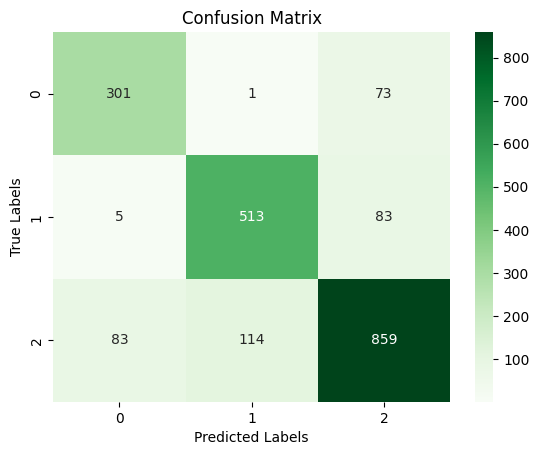


---------------------------------------------



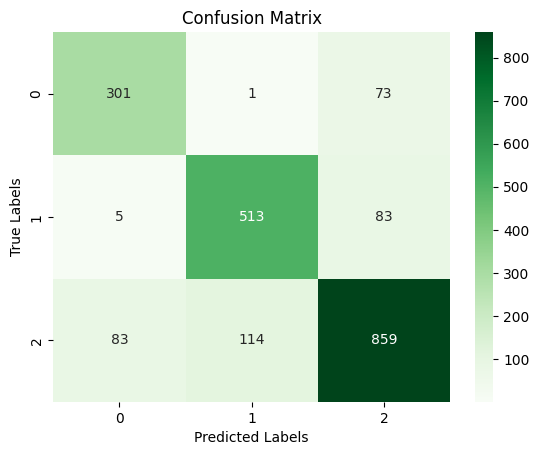

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
evaluate_model(y_test, y_pred)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
print("Class distribution before SMOTE:")
print(y.value_counts())
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts <= 1].index
X_filtered = X_imputed[~y.isin(classes_to_remove)]
y_filtered = y[~y.isin(classes_to_remove)]
smote = SMOTE(random_state=42, k_neighbors=3)
X_sm, y_sm = smote.fit_resample(X_filtered, y_filtered)
print("\nClass distribution after SMOTE:")
print(y_sm.value_counts())


Class distribution before SMOTE:
Credit_Score
2    5280
1    3001
0    1875
3       1
Name: count, dtype: int64

Class distribution after SMOTE:
Credit_Score
0    5280
2    5280
1    5280
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12672, 23)
(3168, 23)
(12672,)
(3168,)


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1056
           1       0.87      0.92      0.89      1056
           2       0.89      0.78      0.83      1056

    accuracy                           0.88      3168
   macro avg       0.88      0.88      0.88      3168
weighted avg       0.88      0.88      0.88      3168


---------------------------------------------



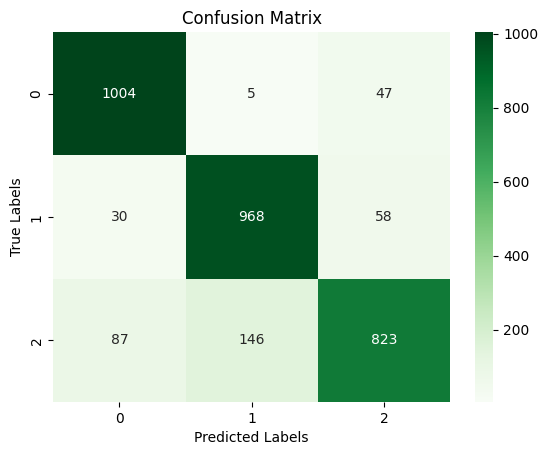


---------------------------------------------



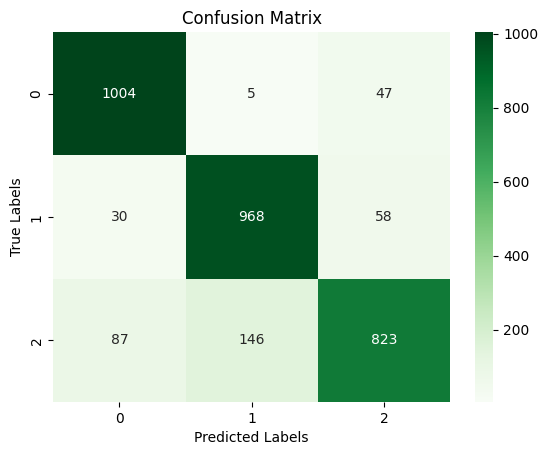

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
evaluate_model(y_test, y_pred)